# Projet / Analyse prédictive des perspectives économiques de l’OCDE

SUJET : Télécharger les données (lien OCDE) de Produit Intérieur Brut (PIB) trimestriel d’au moins 7 pays
de l’OCDE et proposer une analyse fine de ces données par pays, puis une analyse conjointe des dépendances
existant entre pays. Elaborer ensuite des modèles de prédiction linéaires et non-linéaires par pays afin de proposer
des prédictions dont on comparera les performances de manière quantitatives. Proposer pour le meilleur modèle
obtenu, des prévisions à l’échelle des mois à venir.

Nous avons décidé de sélectionner 10 pays parmis ceux proposés, à savoir :
la Chine, la France, la Corée du Sud, le Royaume-uni, le Japon, l'Itallie, l'Inde, l'Allemagne, le Canada et les Etats-Unis.
Nous avons ensuite récupéré les données de chaque pays à partir de l'année 2011 car avant cette date la Chine n'avait pas de données.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv('data_2011.csv')
df

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,KOR,QGDP,TOT,PC_CHGPP,Q,2011-Q1,0.933131,NaN
1,KOR,QGDP,TOT,PC_CHGPP,Q,2011-Q2,0.490791,NaN
2,KOR,QGDP,TOT,PC_CHGPP,Q,2011-Q3,0.526324,NaN
3,KOR,QGDP,TOT,PC_CHGPP,Q,2011-Q4,0.472298,NaN
4,KOR,QGDP,TOT,PC_CHGPP,Q,2012-Q1,0.876511,NaN
...,...,...,...,...,...,...,...,...
375,FRA,QGDP,TOT,PC_CHGPP,Q,2019-Q2,0.295410,NaN
376,FRA,QGDP,TOT,PC_CHGPP,Q,2019-Q3,0.138152,NaN
377,FRA,QGDP,TOT,PC_CHGPP,Q,2019-Q4,-0.178164,NaN
378,FRA,QGDP,TOT,PC_CHGPP,Q,2020-Q1,-5.894381,NaN


## Analyse générale: comparaison entre pays

Dans un premier temps, nous allons nous intéresser à l’aspect “général” de la base de données.
Ceci va nous permettre d’avoir une première vue d’ensemble et de trouver au fur et à mesure des nouvelles problématiques que nous pourrons ensuite analyser statistiquement.

### Superposition des évolutions du PIB (en pourcentage) des 10 pays

In [2]:
df_10=df[['LOCATION','TIME','Value']].copy()
df_10.shape

(380, 3)

In [3]:
listePays = list(set(df['LOCATION']))
listePays

['CHN', 'IND', 'ITA', 'DEU', 'JPN', 'USA', 'CAN', 'KOR', 'FRA', 'GBR']

In [4]:
listeDonnee=[]
listeDate = []
listeMM = []
for p in listePays:
    df1=df.loc[df['LOCATION']==p,:]
    a = df1['Value'].values.tolist()
    b = df1['TIME'].values.tolist()
    c = df1.rolling(3,min_periods=2).mean()
    listeDonnee.append(a)
    listeDate.append(b)
    listeMM.append(c)

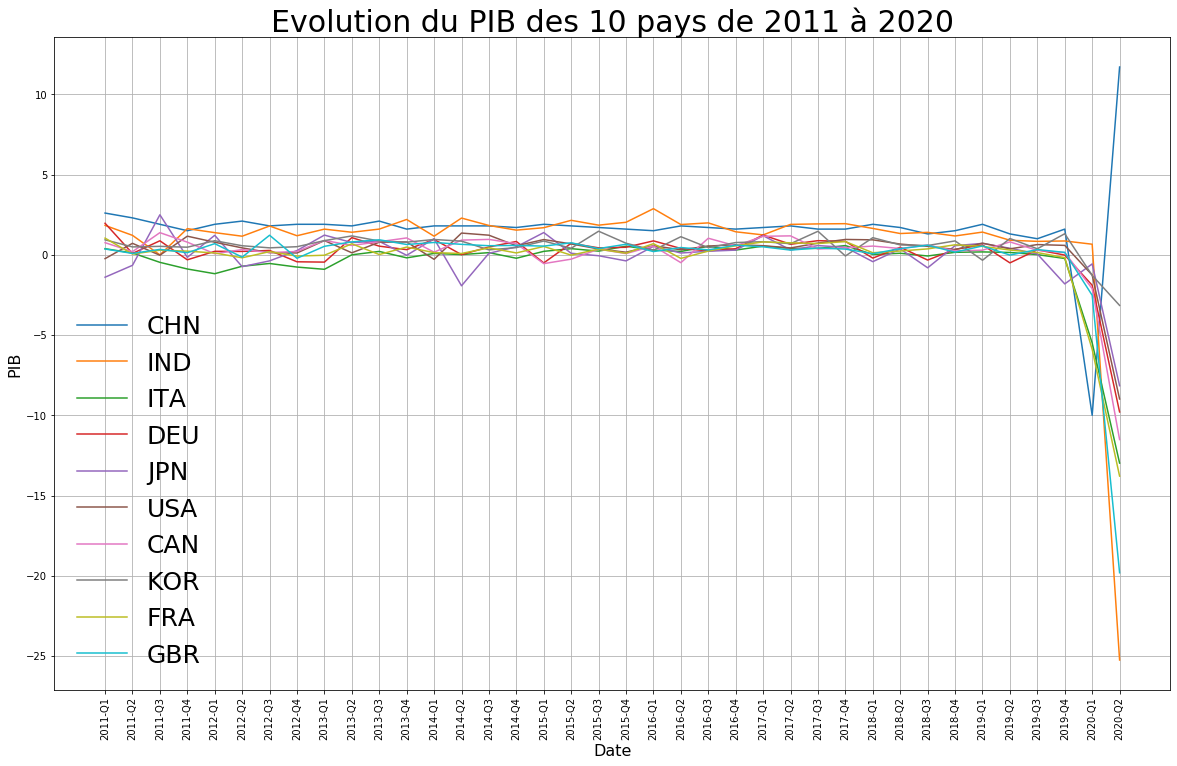

In [5]:
plt.figure(figsize=(20,12))

for date,data,label in zip(listeDate, listeDonnee, listePays) :
    plt.plot(date,data,label=label)

plt.xlabel('Date', fontsize=16)
plt.ylabel('PIB', fontsize=16)
plt.xticks(rotation=90)

plt.grid(True)
plt.title('Evolution du PIB des 10 pays de 2011 à 2020', fontsize=30)
plt.legend(markerscale = 5, frameon = False,  prop={"size":25})
plt.show()

De 2011 à 2019, globalement nous pouvons voir que pour tous les pays le PIB est constant avec quelques variations pour certains pays surement dues à des évènements politiques ou économiques.
Cependant à partir de 2019 nous pouvons voir un changement brutal pour tous les pays.
Directement nous pouvons penser à la crise sanitaire mondiale dûe au SARS-COV-2.
La Chine est le premier pays à avoir une baisse à partir du Q4 en 2019, ce qui coincide avec le début de propagation du virus (rappel: la Chine est le premier pays à avoir été touché).
La Chine est suivie de près par tous les autres pays dans cette chute.
L'Inde est le pays qui a le plus "souffert" dans ce graphique.
Et la Corée du Sud est celui qui, à contrario, a vu son PIB le moins chuter.
Mais la Chine est aussi l'unique pays qui a vu son PIB croitre de manière fulgurante à partir du Q1 en 2020.

### barchart des Value (PIB %) médianes et moyennes par pays

Avec la commande suivante, nous obtenons un barchart qui nous permet de visualiser et comparer les Value (PIB %) médianes et moyennes par pays :

In [6]:
listeMoyenne=[]
listeMediane = []
for p in listePays:
    df1=df.loc[df['LOCATION']==p,:]
    a = round(df1['Value'].mean(),2)
    b = round(df1['Value'].median(),2)
    listeMoyenne.append(a)
    listeMediane.append(b)

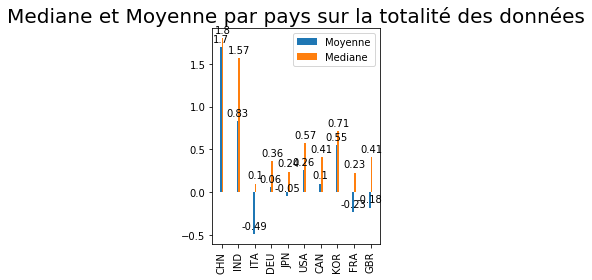

In [7]:
x = np.arange(len(listePays))  # the label locations
width = 0.1  # the width of the bars
fig,ax = plt.subplots()
rects1 = ax.bar(x - width/2, listeMoyenne, width, label='Moyenne')
rects2 = ax.bar(x + width/2, listeMediane, width, label='Mediane')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Mediane et Moyenne par pays sur la totalité des données', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(listePays)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
plt.xticks(rotation=90)
fig.tight_layout()

plt.show()


De base la moyenne d'un l'échantillon (pays) est une estimation non biaisée de la moyenne de la véritable population car converge vers la moyenne réelle de la population entière. 

Cepandant elle peut être fortement impactée par la présence de valeurs aberrantes/extrêmes. 
C'est pour cela que nous avons décidé de rajouter la médiane sur ce graphique pour des mesures plus robustes de la tendance centrale.


->> blabla à faire

### Correlation

Une matrice de corrélation est utilisée pour évaluer la dépendence entre plusieurs variables en même temps. Le résultat est une table contenant les coefficients de corrélation entre chaque variable et les autres.

On commence par créer un dataFrame à partir d'un dictionnaire qui est composé des pays avec comme valeur leur données de PIB.

In [9]:
d = {}
for i in range(0,len(listePays)):
    d[listePays[i]]=listeDonnee[i]

In [10]:
d = {}
for i in range(0,len(listePays)):
    d[listePays[i]]=listeDonnee[i]
df2 = pd.DataFrame(data=d)

In [11]:
corrMatrix = df2.corr()
print (corrMatrix)

          CHN       IND       ITA       DEU       JPN       USA       CAN  \
CHN  1.000000 -0.624204 -0.303593 -0.442745 -0.497198 -0.492840 -0.469461   
IND -0.624204  1.000000  0.916873  0.936120  0.821574  0.964466  0.952541   
ITA -0.303593  0.916873  1.000000  0.947510  0.782925  0.932120  0.941426   
DEU -0.442745  0.936120  0.947510  1.000000  0.820723  0.900995  0.944184   
JPN -0.497198  0.821574  0.782925  0.820723  1.000000  0.804223  0.831237   
USA -0.492840  0.964466  0.932120  0.900995  0.804223  1.000000  0.955783   
CAN -0.469461  0.952541  0.941426  0.944184  0.831237  0.955783  1.000000   
KOR -0.203627  0.787240  0.864617  0.808490  0.661263  0.802159  0.822567   
FRA -0.291553  0.916842  0.985745  0.949003  0.807362  0.939105  0.957862   
GBR -0.536424  0.986174  0.947336  0.955713  0.848500  0.969276  0.969243   

          KOR       FRA       GBR  
CHN -0.203627 -0.291553 -0.536424  
IND  0.787240  0.916842  0.986174  
ITA  0.864617  0.985745  0.947336  
DEU  0.8

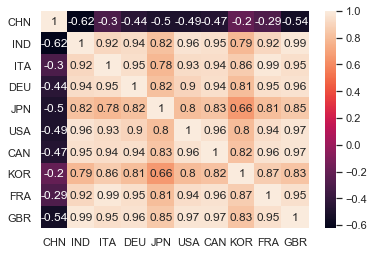

In [12]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

À partir de cette matrice de corrélation, nous pouvons nous apercevoir que les pays de l'Union Européenne et les pays de l'Amérique du Nord ont un indice de corrélation très élevé. Les pays qui sont plutôt opposés comme les Etats-Unis et la Chine ont un indice très négatif. On peut en déduire que le PIB des pays occidentaux sont dépendants les uns des autres alors que celui de la Chine ne dépend pas du PIB de la plupart des autres pays. L'Inde et la Chine ont un indice de corrélation négatif fort.

### Analyse globale des variances par pays

In [13]:
listeVariance=[]
for p in listePays:
    df1=df.loc[df['LOCATION']==p,:]
    d = df1.rolling(3,min_periods=2).var()
    listeVariance.append(d)

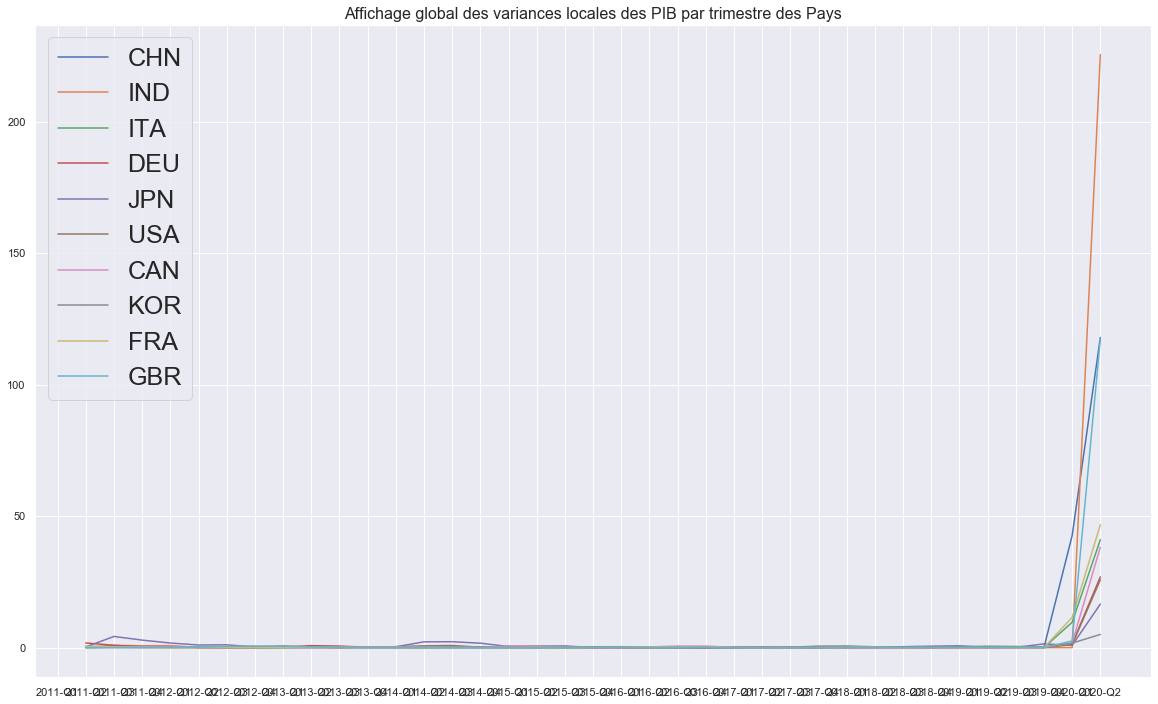

In [14]:
plt.figure(figsize=(20,12))
for d,vm,p in zip(listeDate,listeVariance, listePays) :
    plt.plot(d,vm,label=p)

plt.legend(  prop={"size":25})
plt.title('Affichage global des variances locales des PIB par trimestre des Pays', fontsize=16)
plt.grid(True)
plt.show()

On ne peut pas déduire d'informations à partir de ce graphique. Nous allons donc nous concentrer sur deux périodes :
- avant le covid (2019-Q4)
- après le covid 

### avant Covid

In [15]:
listeAV2019Q4=[]
listeAP2019Q4=[]
avant2019Q4=0
for i in listeDate:
    liste=[]
    index=i.index('2019-Q4') 
    listeAP2019Q4.append(i[index:])
    listeAV2019Q4.append(i[:index])
    avant2019Q4=len(i[:index])

In [16]:
listeVarianceAV = []
listeVarianceAP = []
for i in listeVariance:
    listeVarianceAV.append(i[:avant2019Q4])
    listeVarianceAP.append(i[avant2019Q4:])

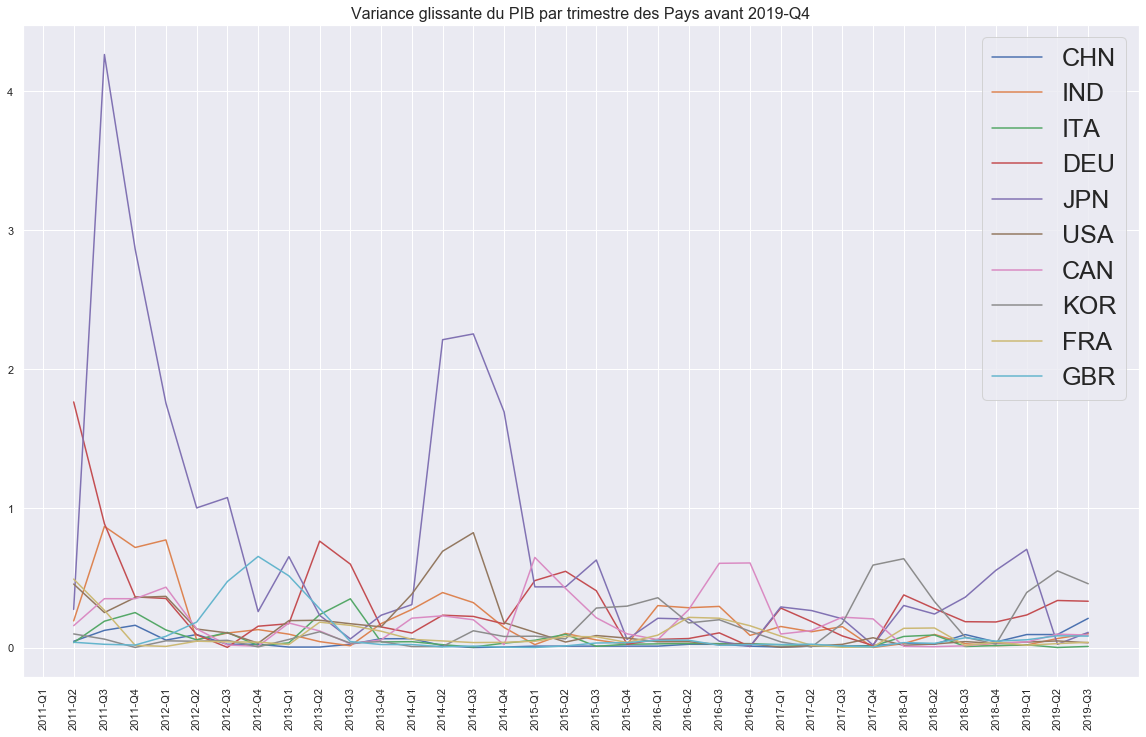

In [17]:
plt.figure(figsize=(20,12))
for d,var,p in zip(listeAV2019Q4,listeVarianceAV, listePays) :
    plt.plot(d,var,label=p)

plt.legend( prop={"size":25})
plt.xticks(rotation=90)
plt.title('Variance glissante du PIB par trimestre des Pays avant 2019-Q4', fontsize=16)
plt.grid(True)
plt.show()

En enlevant la période Covid-19, nous pouvons mieux voir les fluctuations des différents pays. En effet, le Japon se distingue des autres pays en 2011 et en 2014. 

En 2011, la croissance japonaise a été brisée par un séisme. Cette catastrophe a non seulement tué 19 000 personnes dans le Tohoku et entraîné un accident nucléaire à la centrale de Fukushima

Une des causes principales de la baisse de la croissance japonaise en 2014 est la faiblesse de la consommation des ménages. En effet, la faible consommation des ménages s'explique par à la combinaison de deux facteurs: l'augmentation de l'inflation et la hausse insuffisante des salaires.

### après Covid 

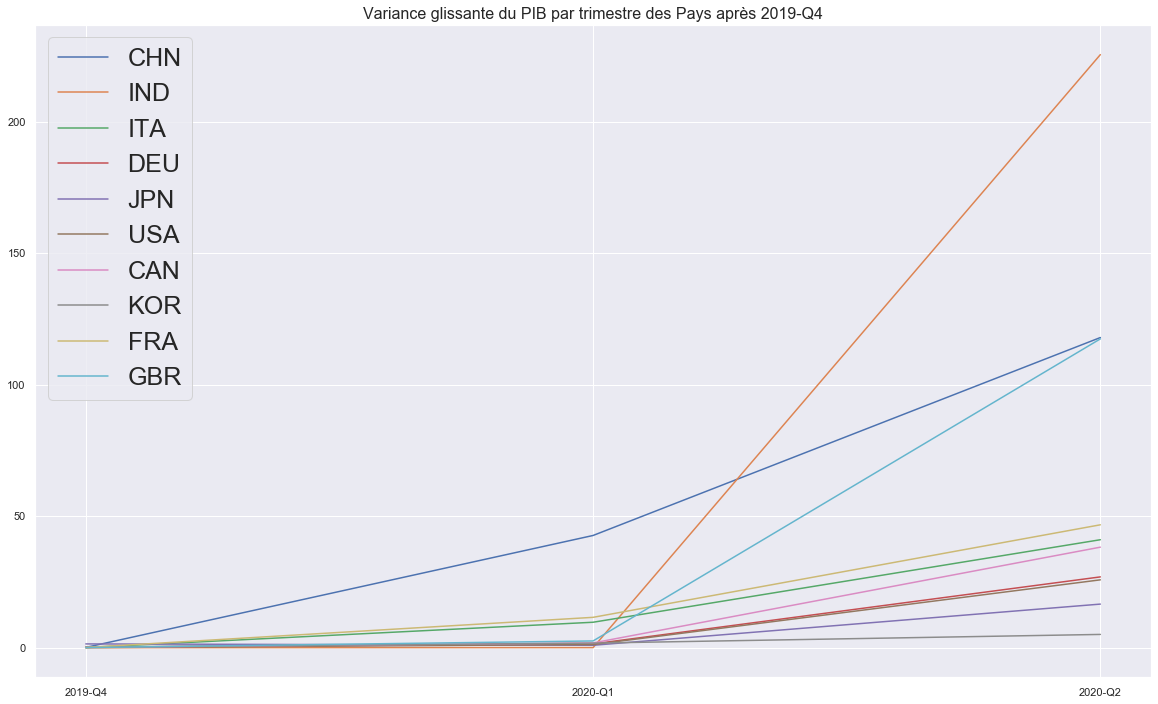

In [18]:
plt.figure(figsize=(20,12))
for d,var,p in zip(listeAP2019Q4,listeVarianceAP, listePays) :
    plt.plot(d,var,label=p)

plt.legend(prop={"size":25})
plt.title('Variance glissante du PIB par trimestre des Pays après 2019-Q4', fontsize=16)
plt.grid(True)
plt.show()

Grâce à la variance, nous pouvons voir que la Chine est le premier pays a être impacté par la crise sanitaire mais que l'Inde a la variance la plus élevée. La Corée du Sud, au contraire, a la variance la plus faible.

## Analyse particulière : le cas de la Corée du Sud

Nous allons maintenant nous concentrer sur le cas de la Corée du Sud. Sur le graphique représentant l'évolution du PIB des 10 pays, nous avons pu déduire que la Corée du Sud est celui qui a le moins "souffert" pendant la crise sanitaire. C'est pourquoi, nous avons pensé qu'il serait intéressant de nous pencher sur ce pays. 

Nous commençons par récupérer les données correspondantes à la Corée du Sud.

In [19]:
kor=df.loc[df['LOCATION']=='KOR',:]
kor=kor[['LOCATION','TIME','Value']].copy()

On va réaliser des statistiques de base:

In [20]:
moy_kor=kor['Value'].median()
print("Médiane : ")
print(moy_kor)

Médiane : 
0.7060833565


In [21]:
moy_kor=kor['Value'].mean()
print("Moyenne : ")
print(moy_kor)

Moyenne : 
0.5547893628157894


In [22]:
var_kor=kor['Value'].var()
print("Variance : ")
var_kor

Variance : 


0.623856553642645

In [23]:
std_kor=kor['Value'].std()
print("Ecart-type : ")
std_kor

Ecart-type : 


0.789845904998339

### L'évolution du PIB de la Corée de 2011 à aujourd'hui (avec les moyennes mobiles)


In [24]:
mm=kor.rolling(3,min_periods=2).mean()
mm.head()

,Value
0,NaN
1,0.711961
2,0.650082
3,0.496471
4,0.625044


In [25]:
kor['MM']=mm
kor.head()

,LOCATION,TIME,Value,MM
0,KOR,2011-Q1,0.933131,NaN
1,KOR,2011-Q2,0.490791,0.711961
2,KOR,2011-Q3,0.526324,0.650082
3,KOR,2011-Q4,0.472298,0.496471
4,KOR,2012-Q1,0.876511,0.625044


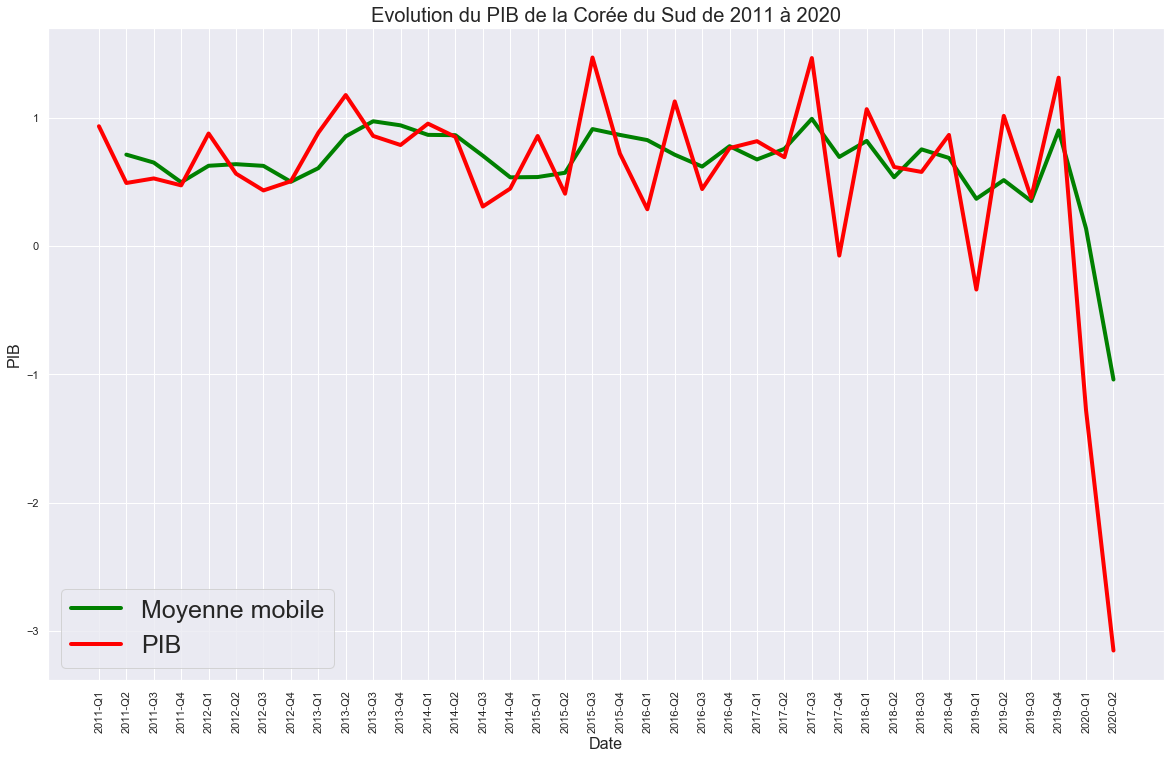

In [26]:
plt.figure(figsize=(20,12))

plt.plot(kor['TIME'], kor['MM'], color='green',label='Moyenne mobile', linewidth=4, markersize=10)
plt.plot(kor['TIME'], kor['Value'], color='red',label='PIB', linewidth=4, markersize=10)


plt.xlabel('Date', fontsize=16)
plt.ylabel('PIB', fontsize=16)
plt.legend(  prop={"size":25})
plt.grid(True)
plt.xticks(rotation=90)
plt.title('Evolution du PIB de la Corée du Sud de 2011 à 2020', fontsize=20)
plt.show()

On peut voir que l'évolution du PIB pour la corée du Sud est globalement positif sauf en 2017, en 2019 et en 2020. 

En 2017, le déclin de croissance s'explique, avant tout, par un recul important des échanges commerciaux avec la Chine. En effet, Pékin a mis en place des mesures de représailles économiques suite au déploiement, en Corée du Sud, d'un bouclier antimissile américain, censé protéger de la menace du Nord.

La Corée du Sud a enregistré en 2019 son PIB le plus faible en 10 ans, et ce sous l'effet de la guerre commerciale sino-américaine et du ralentissement du marché des semi-conducteurs.

En 2020, le déclin conséquent observé est dû à la crise sanitaire mondiale.